In [108]:
import joblib as jl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [109]:
pd.set_option('display.max_rows',50000)
pd.set_option('display.max_columns',500)


In [110]:
DDD_monthly=pd.read_excel('S4 Table_v1_copy.xlsx',sheet_name='Sheet5_1')
DiD_monthly=pd.read_excel('S4 Table_v1_copy.xlsx',sheet_name='Sheet5_2')

In [50]:
DDD_monthly.shape

(60, 33)

In [51]:
DDD_monthly.head()

,year,month,J01AA,J01BA,J01CA,J01CE,J01CF,J01CG,J01CR,J01DA,J01DB,J01DC,J01DD,J01DE,J01DF,J01DH,J01DI,J01EA,J01EB,J01EC,J01EE,J01FA,J01FF,J01FG,J01GA,J01GB,J01MA,J01XA,J01XB,J01XC,J01XD,J01XE,J01XX
0,2011,1,808432.00000,82178.00000,2293639.73300,1581290.86600,127553.93000,5972.50000,9162924.18100,406202.70300,2058451.51500,7040602.99700,6032657.59700,394812.29000,251266.77000,368847.25000,36463.43200,1237.00000,4389,119226.16000,392.33300,7487988.89800,380046.36100,37402.00000,52860,1018480.01900,5763453.83300,132180.08900,3630.00000,84503.99700,1445471.11400,141632.14500,3048642.61400
1,2011,2,616620.00000,45122.24900,1157493.30100,696282.87000,61136.10900,2862.50000,4769411.29200,197234.98700,1104342.02000,3834669.05900,3377467.09400,213818.79100,136951.50500,233383.37500,23492.00100,8530.00000,2709,55221.07400,16.66700,4290421.27800,228961.59000,18734.95000,40400,500394.45100,3398760.75000,90030.33400,80.00000,53749.25300,782166.77600,75703.57300,1526624.53200
2,2011,3,802755.00000,86423.58300,1548117.08800,1330648.93200,90434.89500,7289.50000,5617689.06800,329457.31300,1533168.02300,5369482.61000,5093437.72400,302455.41100,223458.40500,294797.62500,43560.00500,1065.50000,1989,75328.49100,372.00000,5786752.59500,310229.33400,30463.00000,44222,693269.03700,5051867.44900,116273.83500,100.00000,76247.33300,1351392.38900,107942.85800,1763186.51200
3,2011,4,736725.66700,92561.66700,1671628.51000,1363893.90600,115792.60800,6653.00000,8017712.68300,364176.17000,1815438.19100,6185900.90600,5902187.04000,370186.55400,267633.14000,362011.75500,50600.57500,9556.00000,3613,86446.00600,56.66700,6568900.35600,321983.54200,35843.55000,53835,855185.89100,5074208.55000,130223.24300,NaN,88784.16600,1535450.23600,115657.14800,2382097.67100
4,2011,5,1038556.00000,73520.33400,1444498.20400,1482620.94500,110954.71600,8070.00000,5187866.11800,364026.14200,1527030.98000,5131659.71400,5069753.80300,283272.56100,239699.76500,289407.25000,40764.85800,1212.50000,2541,76807.38800,746.00000,5769177.57800,271341.39700,32416.70000,42679,753351.79100,4407539.86700,114328.25300,97.00000,81710.08700,1354098.63500,94492.85500,2152837.94500


In [52]:
DiD_monthly.head()

,year,month,J01AA,J01BA,J01CA,J01CE,J01CF,J01CG,J01CR,J01DA,J01DB,J01DC,J01DD,J01DE,J01DF,J01DH,J01DI,J01EA,J01EB,J01EC,J01EE,J01FA,J01FF,J01FG,J01GA,J01GB,J01MA,J01XA,J01XB,J01XC,J01XD,J01XE,J01XX
0,2011,1,0.17064,0.01735,0.48414,0.33378,0.02692,0.00126,1.93411,0.08574,0.43450,1.48613,1.27337,0.08334,0.05304,0.07786,0.00770,0.00026,0.00093,0.02517,0.00008,1.58056,0.08022,0.00789,0.01116,0.21498,1.21655,0.02790,0.00077,0.01784,0.30511,0.02990,0.64351
1,2011,2,0.13945,0.01020,0.26177,0.15747,0.01383,0.00065,1.07863,0.04461,0.24975,0.86724,0.76384,0.04836,0.03097,0.05278,0.00531,0.00193,0.00061,0.01249,0.00000,0.97031,0.05178,0.00424,0.00914,0.11317,0.76865,0.02036,0.00002,0.01216,0.17689,0.01712,0.34526
2,2011,3,0.16945,0.01824,0.32678,0.28087,0.01909,0.00154,1.18578,0.06954,0.32362,1.13339,1.07512,0.06384,0.04717,0.06223,0.00919,0.00022,0.00042,0.01590,0.00008,1.22147,0.06548,0.00643,0.00933,0.14633,1.06635,0.02454,0.00002,0.01609,0.28525,0.02278,0.37217
3,2011,4,0.15551,0.01954,0.35285,0.28789,0.02444,0.00140,1.69238,0.07687,0.38320,1.30572,1.24583,0.07814,0.05649,0.07641,0.01068,0.00202,0.00076,0.01825,0.00001,1.38656,0.06796,0.00757,0.01136,0.18051,1.07106,0.02749,0.00000,0.01874,0.32410,0.02441,0.50281
4,2011,5,0.21922,0.01552,0.30490,0.31295,0.02342,0.00170,1.09505,0.07684,0.32233,1.08319,1.07012,0.05979,0.05060,0.06109,0.00860,0.00026,0.00054,0.01621,0.00016,1.21776,0.05727,0.00684,0.00901,0.15902,0.93034,0.02413,0.00002,0.01725,0.28582,0.01995,0.45442


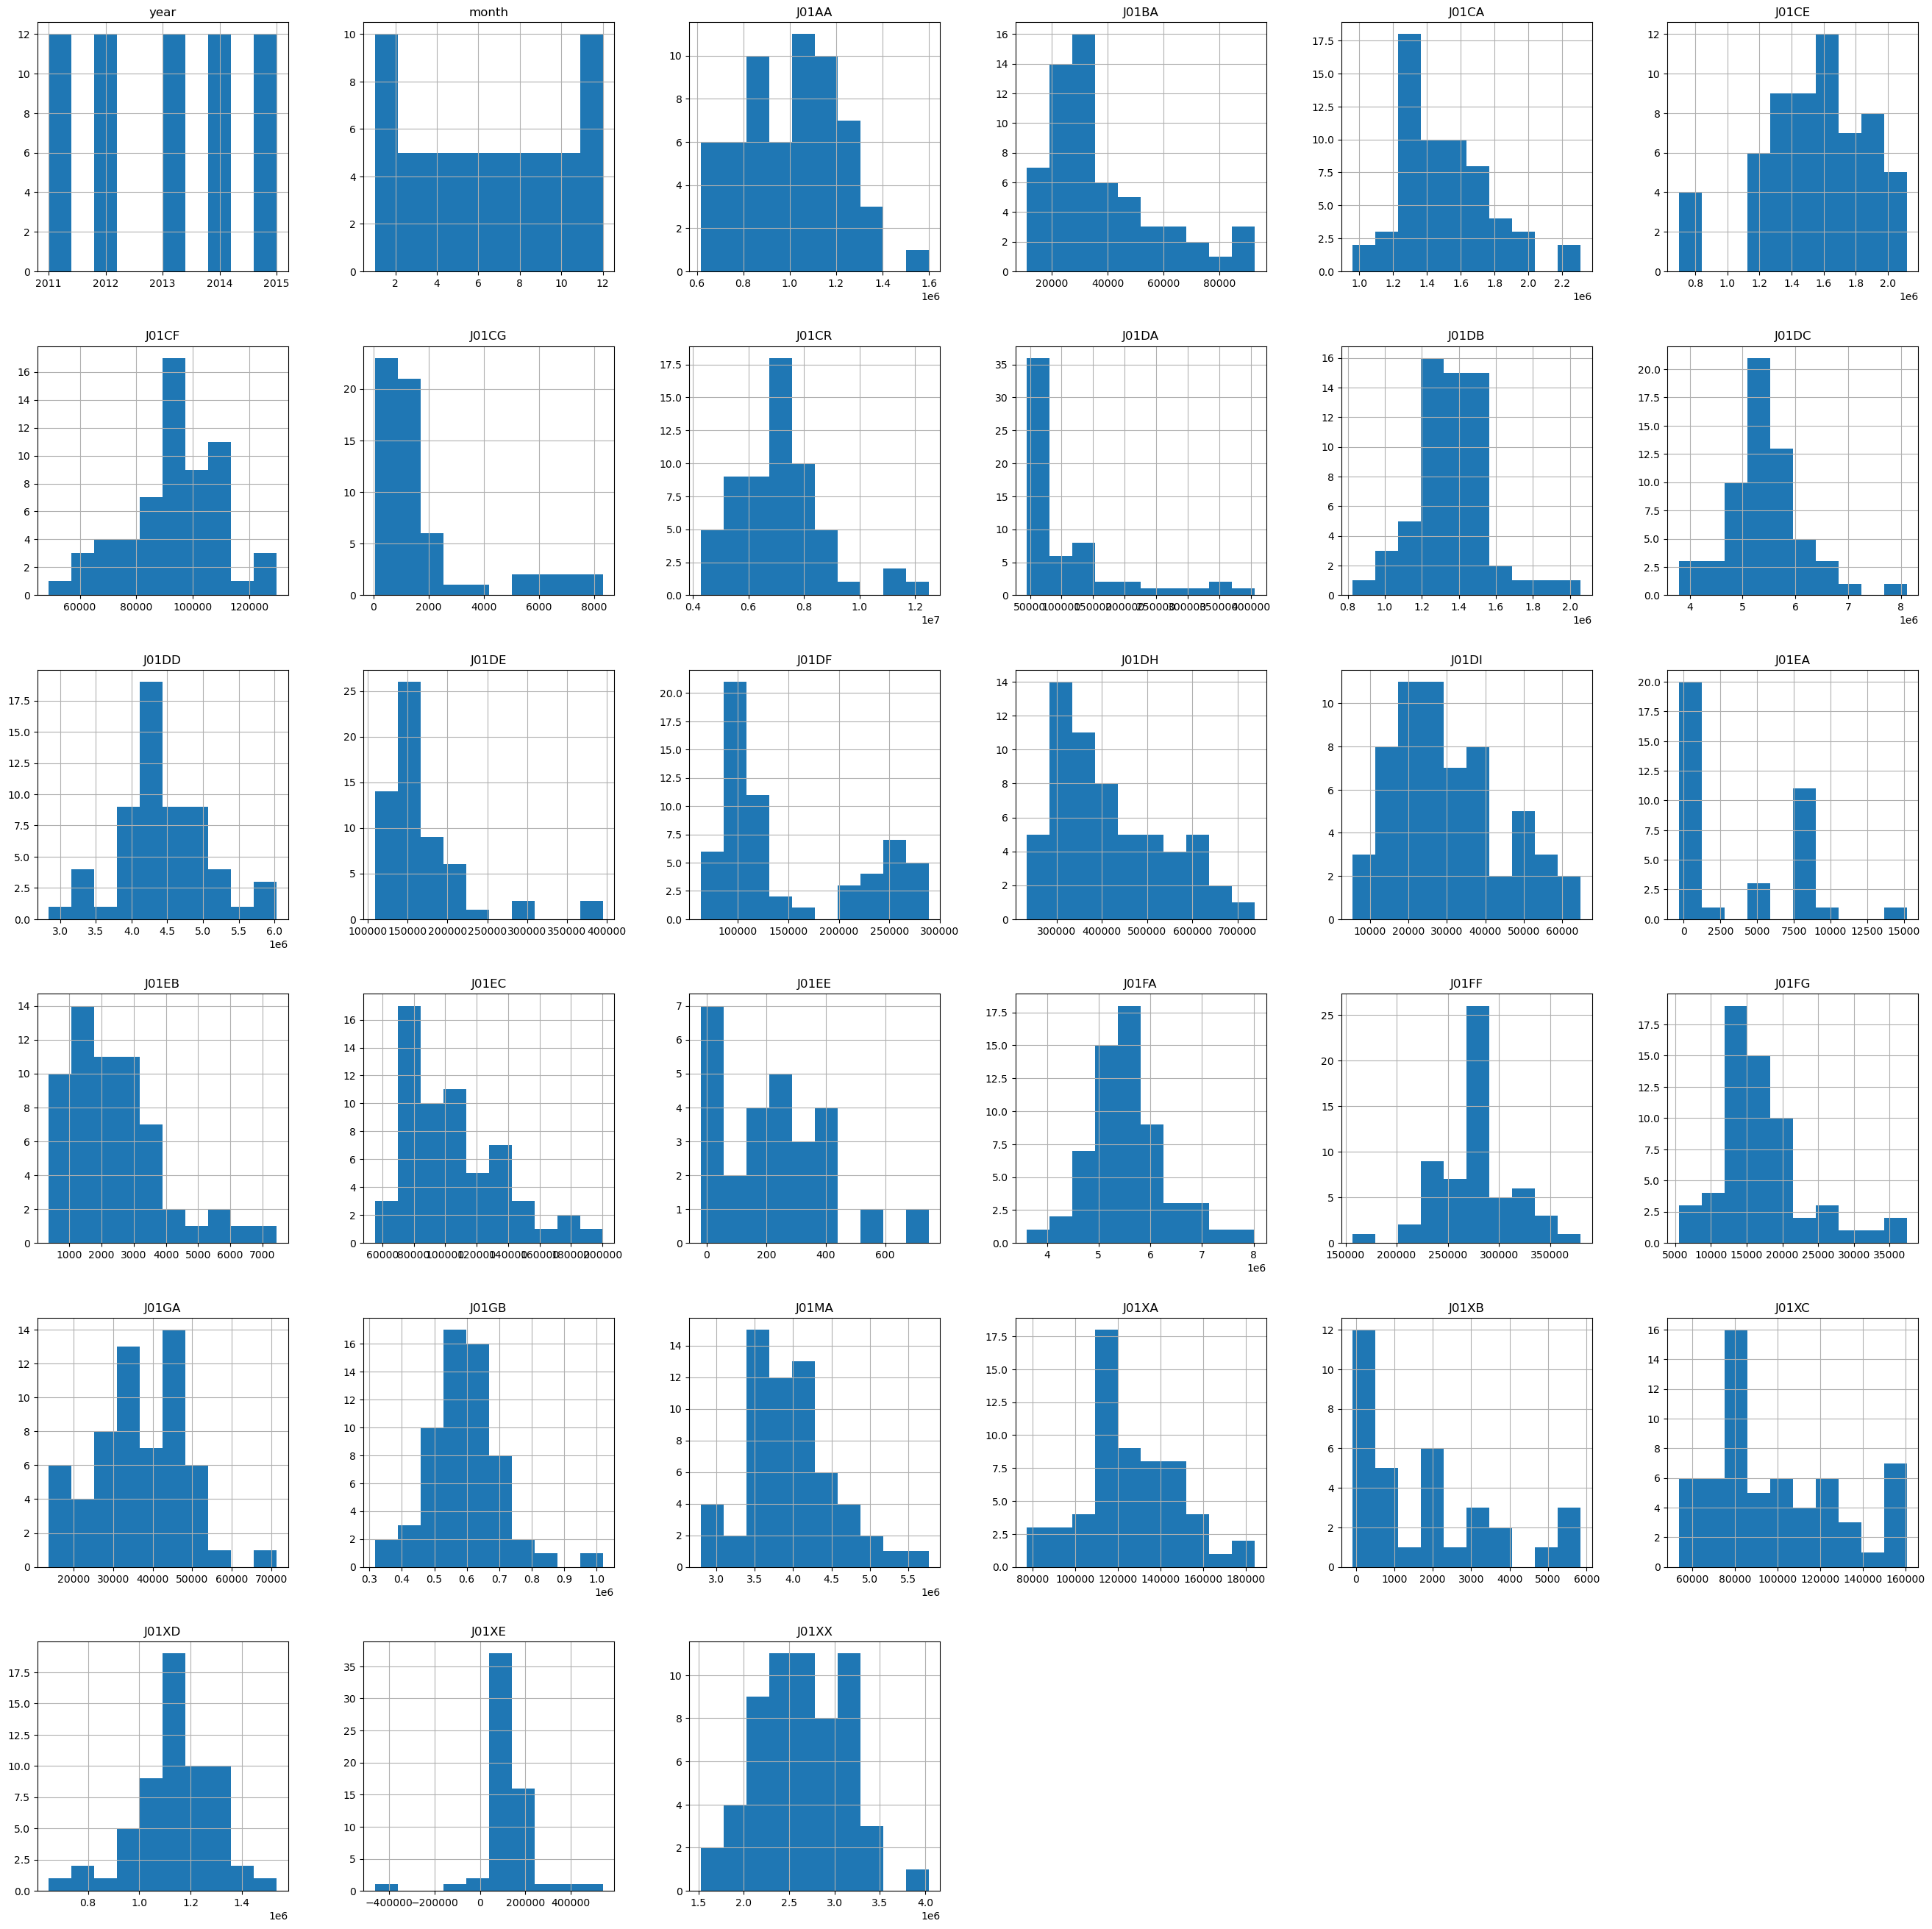

In [111]:
DDD_monthly.hist(figsize=(33,33),layout=(6,6))
plt.show()

In [8]:
DiD_monthly.shape

(60, 33)

In [9]:
DDD_monthly['year'].value_counts()

2011    12
2012    12
2013    12
2014    12
2015    12
Name: year, dtype: int64

In [112]:
DDD_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    60 non-null     int64  
 1   month   60 non-null     int64  
 2   J01AA   60 non-null     float64
 3   J01BA   60 non-null     float64
 4   J01CA   60 non-null     float64
 5   J01CE   60 non-null     float64
 6   J01CF   60 non-null     float64
 7   J01CG   60 non-null     float64
 8   J01CR   60 non-null     float64
 9   J01DA   60 non-null     float64
 10  J01DB   60 non-null     float64
 11  J01DC   60 non-null     float64
 12  J01DD   60 non-null     float64
 13  J01DE   60 non-null     float64
 14  J01DF   60 non-null     float64
 15  J01DH   60 non-null     float64
 16  J01DI   60 non-null     float64
 17  J01EA   37 non-null     float64
 18  J01EB   60 non-null     int64  
 19  J01EC   60 non-null     float64
 20  J01EE   27 non-null     float64
 21  J01FA   60 non-null     float64
 22  J01F

In [67]:
DDD_monthly.isnull().sum()

year      0
month     0
J01AA     0
J01BA     0
J01CA     0
J01CE     0
J01CF     0
J01CG     0
J01CR     0
J01DA     0
J01DB     0
J01DC     0
J01DD     0
J01DE     0
J01DF     0
J01DH     0
J01DI     0
J01EA    23
J01EB     0
J01EC     0
J01EE    33
J01FA     0
J01FF     0
J01FG     0
J01GA     0
J01GB     0
J01MA     0
J01XA     0
J01XB    26
J01XC     0
J01XD     0
J01XE     0
J01XX     0
dtype: int64

In [12]:
DiD_monthly.isnull().sum()

year     0
month    0
J01AA    0
J01BA    0
J01CA    0
J01CE    0
J01CF    0
J01CG    0
J01CR    0
J01DA    0
J01DB    0
J01DC    0
J01DD    0
J01DE    0
J01DF    0
J01DH    0
J01DI    0
J01EA    0
J01EB    0
J01EC    0
J01EE    0
J01FA    0
J01FF    0
J01FG    0
J01GA    0
J01GB    0
J01MA    0
J01XA    0
J01XB    0
J01XC    0
J01XD    0
J01XE    0
J01XX    0
dtype: int64

In [13]:
DDD_monthly.dtypes

year       int64
month      int64
J01AA    float64
J01BA    float64
J01CA    float64
J01CE    float64
J01CF    float64
J01CG    float64
J01CR    float64
J01DA    float64
J01DB    float64
J01DC    float64
J01DD    float64
J01DE    float64
J01DF    float64
J01DH    float64
J01DI    float64
J01EA    float64
J01EB      int64
J01EC    float64
J01EE    float64
J01FA    float64
J01FF    float64
J01FG    float64
J01GA      int64
J01GB    float64
J01MA    float64
J01XA    float64
J01XB    float64
J01XC    float64
J01XD    float64
J01XE    float64
J01XX    float64
dtype: object

In [14]:
DiD_monthly.dtypes

year       int64
month      int64
J01AA    float64
J01BA    float64
J01CA    float64
J01CE    float64
J01CF    float64
J01CG    float64
J01CR    float64
J01DA    float64
J01DB    float64
J01DC    float64
J01DD    float64
J01DE    float64
J01DF    float64
J01DH    float64
J01DI    float64
J01EA    float64
J01EB    float64
J01EC    float64
J01EE    float64
J01FA    float64
J01FF    float64
J01FG    float64
J01GA    float64
J01GB    float64
J01MA    float64
J01XA    float64
J01XB    float64
J01XC    float64
J01XD    float64
J01XE    float64
J01XX    float64
dtype: object

In [113]:
li = ['J01EB','J01GA']

DDD_monthly[li]=DDD_monthly[li].astype('float64')
DDD_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    60 non-null     int64  
 1   month   60 non-null     int64  
 2   J01AA   60 non-null     float64
 3   J01BA   60 non-null     float64
 4   J01CA   60 non-null     float64
 5   J01CE   60 non-null     float64
 6   J01CF   60 non-null     float64
 7   J01CG   60 non-null     float64
 8   J01CR   60 non-null     float64
 9   J01DA   60 non-null     float64
 10  J01DB   60 non-null     float64
 11  J01DC   60 non-null     float64
 12  J01DD   60 non-null     float64
 13  J01DE   60 non-null     float64
 14  J01DF   60 non-null     float64
 15  J01DH   60 non-null     float64
 16  J01DI   60 non-null     float64
 17  J01EA   37 non-null     float64
 18  J01EB   60 non-null     float64
 19  J01EC   60 non-null     float64
 20  J01EE   27 non-null     float64
 21  J01FA   60 non-null     float64
 22  J01F

In [114]:
pd.set_option('display.float_format',lambda x: '%.5f' % x)

In [17]:
DiD_monthly.head(2)

,year,month,J01AA,J01BA,J01CA,J01CE,J01CF,J01CG,J01CR,J01DA,J01DB,J01DC,J01DD,J01DE,J01DF,J01DH,J01DI,J01EA,J01EB,J01EC,J01EE,J01FA,J01FF,J01FG,J01GA,J01GB,J01MA,J01XA,J01XB,J01XC,J01XD,J01XE,J01XX
0,2011,1,0.17064,0.01735,0.48414,0.33378,0.02692,0.00126,1.93411,0.08574,0.43450,1.48613,1.27337,0.08334,0.05304,0.07786,0.00770,0.00026,0.00093,0.02517,0.00008,1.58056,0.08022,0.00789,0.01116,0.21498,1.21655,0.02790,0.00077,0.01784,0.30511,0.02990,0.64351
1,2011,2,0.13945,0.01020,0.26177,0.15747,0.01383,0.00065,1.07863,0.04461,0.24975,0.86724,0.76384,0.04836,0.03097,0.05278,0.00531,0.00193,0.00061,0.01249,0.00000,0.97031,0.05178,0.00424,0.00914,0.11317,0.76865,0.02036,0.00002,0.01216,0.17689,0.01712,0.34526


In [115]:
DDD_monthly=DDD_monthly.interpolate(method='linear',limit_direction='forward')

DDD_monthly.isnull().sum().sum()

0

In [19]:
DDD_monthly.describe()

,year,month,J01AA,J01BA,J01CA,J01CE,J01CF,J01CG,J01CR,J01DA,J01DB,J01DC,J01DD,J01DE,J01DF,J01DH,J01DI,J01EA,J01EB,J01EC,J01EE,J01FA,J01FF,J01FG,J01GA,J01GB,J01MA,J01XA,J01XB,J01XC,J01XD,J01XE,J01XX
count,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000,60.00000
mean,2013.00000,6.50000,1011680.66390,37748.65650,1508265.79248,1545272.98183,93518.47580,1830.47917,7165708.18497,108178.80668,1358527.81198,5442496.47575,4427985.28723,170284.70520,149622.32033,418254.72900,30563.86792,4136.04792,2381.30000,103862.22465,175.71252,5539823.97845,277209.25168,17213.06250,36511.13333,589795.43965,3970255.24763,125864.22303,1291.18333,99836.79820,1141095.23530,112752.31477,2642274.28678
std,1.42615,3.48118,209879.19055,19488.94360,275238.30976,335184.90944,16559.39310,2082.33803,1592029.32101,85569.49164,203829.44328,744161.82387,629705.88022,53462.12785,70760.39898,123224.66184,14069.90348,3494.50804,1516.59174,31569.92280,141.56831,773878.39359,37100.82173,6372.26646,11787.24191,111679.75497,583507.33829,22481.84731,1587.80800,29990.84620,163911.55947,110877.11681,498551.48478
min,2011.00000,1.00000,616620.00000,10993.16700,960667.05300,696282.87000,48937.39300,50.00000,4284636.24200,44864.53400,827250.07300,3793740.86700,2837966.66200,108730.33600,63348.50000,233383.37500,5539.42900,-339.25000,360.00000,55221.07400,-20.00000,3610638.81200,157096.80700,5518.00000,13779.00000,316625.84900,2797643.50000,77297.42100,-78.00000,53749.25300,647230.15700,-464257.13400,1526624.53200
25%,2012.00000,3.75000,861723.45850,25999.41700,1323105.54800,1358293.02950,86436.83925,707.25000,6041669.51500,60432.03125,1242884.13250,5026901.05275,4123737.92550,138397.73025,97780.09375,327065.91500,20503.56275,503.56250,1352.50000,79433.34275,61.04175,5077682.98300,256915.66725,13394.87500,29773.50000,529791.75525,3596878.33750,112317.66600,50.00000,78494.79200,1060899.73350,81415.68075,2288818.77350
50%,2013.00000,6.50000,1025744.91650,31491.45750,1448611.05000,1567270.16500,93480.89300,1100.00000,7057364.96700,68805.37050,1346127.04600,5404080.10450,4349239.04000,156078.12600,110512.38000,380016.50000,26762.28700,5000.00000,1962.00000,98730.65350,160.15625,5507361.15750,278825.97400,16718.25000,36546.00000,591324.36500,3960231.57950,121683.62400,675.83333,90752.91450,1147921.22400,103403.57700,2673487.50050
75%,2014.00000,9.25000,1172548.75025,45965.85550,1675403.09075,1813291.75250,104994.56250,1738.06250,7743503.96575,129954.84125,1467844.50975,5817460.71275,4865262.60500,178328.01825,227518.74500,499379.62750,38545.14225,7500.00000,3061.50000,120138.12000,236.32812,5842133.62725,289932.77800,18977.93750,44235.75000,642196.99900,4272492.34025,140642.62200,2129.25000,121888.18750,1246715.25100,142013.39175,3026681.27575
max,2015.00000,12.00000,1599060.00000,92561.66700,2311695.44900,2118915.42800,129818.71500,8319.50000,12492330.34000,406202.70300,2058451.51500,8108802.58600,6032657.59700,394812.29000,288961.27500,738401.00000,64793.13700,15197.50000,7440.00000,200115.82000,746.00000,8019353.54000,380046.36100,37402.00000,71290.00000,1018480.01900,5763453.83300,184214.92000,5850.00000,160504.41400,1535450.23600,540946.39600,4037451.39600


In [20]:
t=DDD_monthly.loc[:,['year','month']]


In [21]:
b=DDD_monthly.iloc[:,2:]


In [22]:
new=pd.concat([t,b],axis=1)


In [23]:
DDD_monthly.columns

Index(['year', 'month', 'J01AA', 'J01BA', 'J01CA', 'J01CE', 'J01CF', 'J01CG',
       'J01CR', 'J01DA', 'J01DB', 'J01DC', 'J01DD', 'J01DE', 'J01DF', 'J01DH',
       'J01DI', 'J01EA', 'J01EB', 'J01EC', 'J01EE', 'J01FA', 'J01FF', 'J01FG',
       'J01GA', 'J01GB', 'J01MA', 'J01XA', 'J01XB', 'J01XC', 'J01XD', 'J01XE',
       'J01XX'],
      dtype='object')

In [116]:
num_of_DDD = pd.DataFrame()


for fcn in DDD_monthly.columns[2:]:
    df_temp=DDD_monthly.loc[:,['year','month']]
    #new feature
    df_temp['fcn_DDD']=fcn
    df_temp['fcnv_DDD']=DDD_monthly.loc[:,[fcn]]
    print(df_temp)
    num_of_DDD=pd.concat([num_of_DDD,df_temp],axis=0)
    
    
    

    year  month fcn_DDD      fcnv_DDD
0   2011      1   J01AA  808432.00000
1   2011      2   J01AA  616620.00000
2   2011      3   J01AA  802755.00000
3   2011      4   J01AA  736725.66700
4   2011      5   J01AA 1038556.00000
5   2011      6   J01AA  723845.00000
6   2011      7   J01AA 1167219.66700
7   2011      8   J01AA 1165529.66600
8   2011      9   J01AA 1333814.33300
9   2011     10   J01AA  743772.00000
10  2011     11   J01AA 1091736.50000
11  2011     12   J01AA 1170854.00000
12  2012      1   J01AA  873786.50000
13  2012      2   J01AA  696654.66700
14  2012      3   J01AA  863607.66700
15  2012      4   J01AA 1056493.33300
16  2012      5   J01AA  894159.50000
17  2012      6   J01AA 1203036.66700
18  2012      7   J01AA 1144086.66700
19  2012      8   J01AA 1308565.66600
20  2012      9   J01AA 1030127.50000
21  2012     10   J01AA  644681.66700
22  2012     11   J01AA  911050.00000
23  2012     12   J01AA  707415.00000
24  2013      1   J01AA  858098.83300
25  2013    

    year  month fcn_DDD      fcnv_DDD
0   2011      1   J01DD 6032657.59700
1   2011      2   J01DD 3377467.09400
2   2011      3   J01DD 5093437.72400
3   2011      4   J01DD 5902187.04000
4   2011      5   J01DD 5069753.80300
5   2011      6   J01DD 4559610.18800
6   2011      7   J01DD 4369256.30600
7   2011      8   J01DD 4349902.45400
8   2011      9   J01DD 4348575.62600
9   2011     10   J01DD 3455975.03800
10  2011     11   J01DD 4076330.16900
11  2011     12   J01DD 4224302.43800
12  2012      1   J01DD 4272063.36500
13  2012      2   J01DD 3832344.68800
14  2012      3   J01DD 5014985.88000
15  2012      4   J01DD 4472001.27400
16  2012      5   J01DD 4269486.55000
17  2012      6   J01DD 4038069.43900
18  2012      7   J01DD 4139540.51100
19  2012      8   J01DD 4167688.57100
20  2012      9   J01DD 4251349.54100
21  2012     10   J01DD 3246325.99500
22  2012     11   J01DD 3801706.50400
23  2012     12   J01DD 4064828.82500
24  2013      1   J01DD 4849762.02900
25  2013    

    year  month fcn_DDD    fcnv_DDD
0   2011      1   J01FG 37402.00000
1   2011      2   J01FG 18734.95000
2   2011      3   J01FG 30463.00000
3   2011      4   J01FG 35843.55000
4   2011      5   J01FG 32416.70000
5   2011      6   J01FG 26522.05000
6   2011      7   J01FG 26812.00000
7   2011      8   J01FG 15231.95000
8   2011      9   J01FG 15837.55000
9   2011     10   J01FG 13159.90000
10  2011     11   J01FG 12437.40000
11  2011     12   J01FG 17272.50000
12  2012      1   J01FG 14049.50000
13  2012      2   J01FG 13681.35000
14  2012      3   J01FG 22500.00000
15  2012      4   J01FG 13310.50000
16  2012      5   J01FG 20122.25000
17  2012      6   J01FG 13207.40000
18  2012      7   J01FG 12019.20000
19  2012      8   J01FG 14485.50000
20  2012      9   J01FG 19398.50000
21  2012     10   J01FG  9006.10000
22  2012     11   J01FG 13423.00000
23  2012     12   J01FG 14816.50000
24  2013      1   J01FG 21051.80000
25  2013      2   J01FG  9875.50000
26  2013      3   J01FG 1691

In [25]:
num_of_DDD.shape

(1860, 4)

In [26]:
31*60

1860

In [27]:
num_of_DDD.head()

,year,month,fcn_DDD,fcnv_DDD
0,2011,1,J01AA,808432.00000
1,2011,2,J01AA,616620.00000
2,2011,3,J01AA,802755.00000
3,2011,4,J01AA,736725.66700
4,2011,5,J01AA,1038556.00000


In [117]:
monthly_DID_in_sample_ATC_4=pd.DataFrame()
for fcn in DiD_monthly.columns[2:] :
    df_temp2=DiD_monthly.loc[:,['year','month']]
    df_temp2['fcn_DID']=fcn
    df_temp2['fcnv_DID']=DiD_monthly.loc[:,[fcn]]
    monthly_DID_in_sample_ATC_4=pd.concat([monthly_DID_in_sample_ATC_4,df_temp2],axis=0)
monthly_DID_in_sample_ATC_4.head()

,year,month,fcn_DID,fcnv_DID
0,2011,1,J01AA,0.17064
1,2011,2,J01AA,0.13945
2,2011,3,J01AA,0.16945
3,2011,4,J01AA,0.15551
4,2011,5,J01AA,0.21922


In [118]:
DDD_DID=pd.concat([num_of_DDD,monthly_DID_in_sample_ATC_4['fcnv_DID']],axis=1,
                  ignore_index=True)
DDD_DID.columns=['year','month','fcn','fcnv_DDD','fcnv_DID']
DDD_DID.head()

,year,month,fcn,fcnv_DDD,fcnv_DID
0,2011,1,J01AA,808432.00000,0.17064
1,2011,2,J01AA,616620.00000,0.13945
2,2011,3,J01AA,802755.00000,0.16945
3,2011,4,J01AA,736725.66700,0.15551
4,2011,5,J01AA,1038556.00000,0.21922


In [78]:


DDD_DID.to_excel('DDD_DID.xlsx')

In [119]:
df=pd.read_excel('DDD_DID.xlsx')
df

,id,year,month,fcn,fcnv_DDD,fcnv_DID
0,0,2011,1,J01AA,808432.00000,0.17064
1,1,2011,2,J01AA,616620.00000,0.13945
2,2,2011,3,J01AA,802755.00000,0.16945
3,3,2011,4,J01AA,736725.66700,0.15551
4,4,2011,5,J01AA,1038556.00000,0.21922
5,5,2011,6,J01AA,723845.00000,0.15279
6,6,2011,7,J01AA,1167219.66700,0.24638
7,7,2011,8,J01AA,1165529.66600,0.24602
8,8,2011,9,J01AA,1333814.33300,0.28154
9,9,2011,10,J01AA,743772.00000,0.15700


In [120]:
df=df.set_index("id")
df

,year,month,fcn,fcnv_DDD,fcnv_DID
id,,,,,
0,2011,1,J01AA,808432.00000,0.17064
1,2011,2,J01AA,616620.00000,0.13945
2,2011,3,J01AA,802755.00000,0.16945
3,2011,4,J01AA,736725.66700,0.15551
4,2011,5,J01AA,1038556.00000,0.21922
5,2011,6,J01AA,723845.00000,0.15279
6,2011,7,J01AA,1167219.66700,0.24638
7,2011,8,J01AA,1165529.66600,0.24602
8,2011,9,J01AA,1333814.33300,0.28154


In [121]:
df.fcnv_DDD[df['fcnv_DDD']<0]

id
907       -339.25000
931        -45.00000
1090        -3.00000
1093       -20.00000
1570       -78.00000
1573        -1.00000
1577        -1.00000
1752    -66739.24500
1754   -464257.13400
Name: fcnv_DDD, dtype: float64

In [32]:
DDD_DID.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
            50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
           dtype='int64', length=1860)

In [122]:
negative_value_index=df[df['fcnv_DDD']<0].index
negative_value_index

Int64Index([907, 931, 1090, 1093, 1570, 1573, 1577, 1752, 1754], dtype='int64', name='id')

In [84]:

df[df['fcnv_DDD']<0]

,year,month,fcn,fcnv_DDD,fcnv_DID
id,,,,,
907,2011,8,J01EA,-339.25000,-0.00007
931,2013,8,J01EA,-45.00000,-0.00001
1090,2011,11,J01EE,-3.00000,-0.00000
1093,2012,2,J01EE,-20.00000,-0.00000
1570,2011,11,J01XB,-78.00000,-0.00002
1573,2012,2,J01XB,-1.00000,-0.00000
1577,2012,6,J01XB,-1.00000,-0.00000
1752,2012,1,J01XE,-66739.24500,-0.01501
1754,2012,3,J01XE,-464257.13400,-0.10443


In [76]:
DDD_DID.query('fcnv_DDD<0')

,year,month,fcn,fcnv_DDD,fcnv_DID
7,2011,8,J01EA,-339.25000,-0.00007
31,2013,8,J01EA,-45.00000,-0.00001
10,2011,11,J01EE,-3.00000,-0.00000
13,2012,2,J01EE,-20.00000,-0.00000
10,2011,11,J01XB,-78.00000,-0.00002
13,2012,2,J01XB,-1.00000,-0.00000
17,2012,6,J01XB,-1.00000,-0.00000
12,2012,1,J01XE,-66739.24500,-0.01501
14,2012,3,J01XE,-464257.13400,-0.10443


In [123]:
df.iloc[negative_value_index,[3]]

,fcnv_DDD
id,
907,-339.25000
931,-45.00000
1090,-3.00000
1093,-20.00000
1570,-78.00000
1573,-1.00000
1577,-1.00000
1752,-66739.24500
1754,-464257.13400


In [124]:
df.iloc[negative_value_index,[3]]=0

df.iloc[negative_value_index]

,year,month,fcn,fcnv_DDD,fcnv_DID
id,,,,,
907,2011,8,J01EA,0.00000,-0.00007
931,2013,8,J01EA,0.00000,-0.00001
1090,2011,11,J01EE,0.00000,-0.00000
1093,2012,2,J01EE,0.00000,-0.00000
1570,2011,11,J01XB,0.00000,-0.00002
1573,2012,2,J01XB,0.00000,-0.00000
1577,2012,6,J01XB,0.00000,-0.00000
1752,2012,1,J01XE,0.00000,-0.01501
1754,2012,3,J01XE,0.00000,-0.10443


In [125]:
df.iloc[negative_value_index,[4]]=0

In [89]:
df[df['fcnv_DDD']==0]

,year,month,fcn,fcnv_DDD,fcnv_DID
id,,,,,
907,2011,8,J01EA,0.00000,0.00000
931,2013,8,J01EA,0.00000,0.00000
1090,2011,11,J01EE,0.00000,0.00000
1093,2012,2,J01EE,0.00000,0.00000
1570,2011,11,J01XB,0.00000,0.00000
1573,2012,2,J01XB,0.00000,0.00000
1577,2012,6,J01XB,0.00000,0.00000
1752,2012,1,J01XE,0.00000,0.00000
1754,2012,3,J01XE,0.00000,0.00000


In [126]:
df.query('fcnv_DDD<0')

,year,month,fcn,fcnv_DDD,fcnv_DID
id,,,,,


In [127]:
df.to_excel('DDD2.xlsx')


In [129]:
data=pd.read_excel('DDD_serie.xlsx')

In [130]:
data.head()

,id,year,month,fcn,fcnv_DDD,fcnv_DID,ds
0,0,2011,1,J01AA,808432.00000,0.17064,2011-01-30
1,1,2011,2,J01AA,616620.00000,0.13945,2011-03-02
2,2,2011,3,J01AA,802755.00000,0.16945,2011-03-30
3,3,2011,4,J01AA,736725.66700,0.15551,2011-04-30
4,4,2011,5,J01AA,1038556.00000,0.21922,2011-05-30


In [131]:
data_DDD=data.drop('fcnv_DID',axis=1)
data_DiD=data.drop('fcnv_DDD',axis=1)

In [132]:
data_DDD.shape

(1860, 6)

In [133]:
data_DDD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860 entries, 0 to 1859
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        1860 non-null   int64         
 1   year      1860 non-null   int64         
 2   month     1860 non-null   int64         
 3   fcn       1860 non-null   object        
 4   fcnv_DDD  1860 non-null   float64       
 5   ds        1860 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 87.3+ KB


In [136]:
li = ['id','year','month']
li2=['year','month','id']

df_DDD=data_DDD.drop(li,axis=1)
df_DID=data_DiD.drop(li2,axis=1)

In [137]:
df_DDD=df_DDD.set_index("ds")
df_DID=df_DID.set_index("ds")

In [138]:
df_DDD.head()

,fcn,fcnv_DDD
ds,,
2011-01-30,J01AA,808432.00000
2011-03-02,J01AA,616620.00000
2011-03-30,J01AA,802755.00000
2011-04-30,J01AA,736725.66700
2011-05-30,J01AA,1038556.00000


In [139]:
df_DDD['fcnv_DDD'].min(axis=0)

0.0

In [140]:
df_DDD['fcnv_DDD'].max(axis=0)

12492330.34

In [142]:
fcn=df_DDD['fcnv_DDD']

fcn_scale = (fcn-fcn.min(axis=0))/(fcn.max(axis=0)-fcn.min(axis=0))

df_DDD['fcnv_DDD']=fcn_scale

In [145]:
df_DDD.head(30)

,fcn,fcnv_DDD
ds,,
2011-01-30,J01AA,0.06471
2011-03-02,J01AA,0.04936
2011-03-30,J01AA,0.06426
2011-04-30,J01AA,0.05897
2011-05-30,J01AA,0.08314
2011-06-30,J01AA,0.05794
2011-07-30,J01AA,0.09343
2011-08-30,J01AA,0.09330
2011-09-30,J01AA,0.10677


In [146]:
df_DDD.iloc[0:12,1]

ds
2011-01-30   0.06471
2011-03-02   0.04936
2011-03-30   0.06426
2011-04-30   0.05897
2011-05-30   0.08314
2011-06-30   0.05794
2011-07-30   0.09343
2011-08-30   0.09330
2011-09-30   0.10677
2011-10-30   0.05954
2011-11-30   0.08739
2011-12-30   0.09373
Name: fcnv_DDD, dtype: float64

In [149]:
# Creating a data structure with 12 timesteps and 1 output
x_train=[]
y_train=[]

for i in range(12,1860):
    x_train.append(df_DDD.iloc[i-12:i,1])
    y_train.append(df_DDD.iloc[i,1])
    
x_train=np.array(x_train)    
y_train=np.array(y_train)

In [150]:
x_train

array([[0.06471427, 0.04935989, 0.06425983, ..., 0.05953829, 0.08739254,
        0.09372583],
       [0.04935989, 0.06425983, 0.05897424, ..., 0.08739254, 0.09372583,
        0.06994584],
       [0.06425983, 0.05897424, 0.08313549, ..., 0.09372583, 0.06994584,
        0.05576659],
       ...,
       [0.17555786, 0.1843569 , 0.24811794, ..., 0.2802294 , 0.2558093 ,
        0.24079258],
       [0.1843569 , 0.24811794, 0.25767697, ..., 0.2558093 , 0.24079258,
        0.19412645],
       [0.24811794, 0.25767697, 0.22329827, ..., 0.24079258, 0.19412645,
        0.25403133]])

In [151]:
x_train_DDD=pd.DataFrame(x_train)
x_train_DDD

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.06471,0.04936,0.06426,0.05897,0.08314,0.05794,0.09343,0.09330,0.10677,0.05954,0.08739,0.09373
1,0.04936,0.06426,0.05897,0.08314,0.05794,0.09343,0.09330,0.10677,0.05954,0.08739,0.09373,0.06995
2,0.06426,0.05897,0.08314,0.05794,0.09343,0.09330,0.10677,0.05954,0.08739,0.09373,0.06995,0.05577
3,0.05897,0.08314,0.05794,0.09343,0.09330,0.10677,0.05954,0.08739,0.09373,0.06995,0.05577,0.06913
4,0.08314,0.05794,0.09343,0.09330,0.10677,0.05954,0.08739,0.09373,0.06995,0.05577,0.06913,0.08457
5,0.05794,0.09343,0.09330,0.10677,0.05954,0.08739,0.09373,0.06995,0.05577,0.06913,0.08457,0.07158
6,0.09343,0.09330,0.10677,0.05954,0.08739,0.09373,0.06995,0.05577,0.06913,0.08457,0.07158,0.09630
7,0.09330,0.10677,0.05954,0.08739,0.09373,0.06995,0.05577,0.06913,0.08457,0.07158,0.09630,0.09158
8,0.10677,0.05954,0.08739,0.09373,0.06995,0.05577,0.06913,0.08457,0.07158,0.09630,0.09158,0.10475
9,0.05954,0.08739,0.09373,0.06995,0.05577,0.06913,0.08457,0.07158,0.09630,0.09158,0.10475,0.08246


In [152]:
y_train_DDD=pd.DataFrame(y_train)


In [154]:
# Reshaping
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1848, 12, 1)

In [156]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [157]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)



Epoch 1/100
58/58 [==============================] - 30s 79ms/step - loss: 0.0102
Epoch 2/100
58/58 [==============================] - 6s 111ms/step - loss: 0.0070
Epoch 3/100
58/58 [==============================] - 5s 92ms/step - loss: 0.0067
Epoch 4/100
58/58 [==============================] - 5s 87ms/step - loss: 0.0062
Epoch 5/100
58/58 [==============================] - 7s 121ms/step - loss: 0.0056 2s - loss: 0.0 - ETA: 1s - loss: 0.0 - ETA: 1s
Epoch 6/100
58/58 [==============================] - 5s 79ms/step - loss: 0.0051
Epoch 7/100
58/58 [==============================] - 4s 74ms/step - loss: 0.0053
Epoch 8/100
58/58 [==============================] - 5s 82ms/step - loss: 0.0046
Epoch 9/100
58/58 [==============================] - 5s 94ms/step - loss: 0.0042: 2s - loss - ETA - ETA: 0s - loss: 0.004
Epoch 10/100
58/58 [==============================] - 4s 74ms/step - loss: 0.0041
Epoch 11/100
58/58 [==============================] - 6s 98ms/step - loss: 0.0043
Epoch 12/100
58/

58/58 [==============================] - 4s 72ms/step - loss: 0.0027
Epoch 99/100
58/58 [==============================] - 4s 77ms/step - loss: 0.0031
Epoch 100/100
58/58 [==============================] - 3s 60ms/step - loss: 0.0030
